**Introduction**
The goal of this challenge is to create a machine learning algorithm to accurately predict whether an image contains either a cat or a dog. This type of task is useful in tasks such as animal species image recognition for restricting access. Human beings can easily differentiate between a cat and a dog, but it is a tedious task that needs full-time availability. Machine learning can be used to provide an automated solution for this.

**Data**
The data set is composed of two folders and two .csv files. The train_images folder contains 10,000 labelled images, each with an id that is referred to in the train.csv file. The test_images folder contains 1,000 test images for which the labels need to be predicted using the model. The train.csv and test.csv files contain the details of the training and testing data, respectively.

**Methodology**
Any machine learning algorithm can be used to build the models, either from the sessions or from research based on the topics discussed. The random state should be set to 100 in order to generate comparative results.


In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm

from random import randint
from random import seed

RANDOM_SEED = 100

Drive and file setup

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # unzip file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/train_images.zip')

In [ ]:
# unzip file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/test_images.zip')

##Load image data sets

In [ ]:
data_train = ('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
data_test = ('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
# load training data
df_train = pd.read_csv(os.path.join(data_train))

# summarise the details
print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 10000


,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


In [ ]:
# load testing data
df_test = pd.read_csv(os.path.join(data_test))

# summarise the details
print(f'Number of entries: {len(df_test)}')
df_test.head()

Number of entries: 1000


,id
0,1
1,2
2,3
3,4
4,5


<AxesSubplot:xlabel='label', ylabel='count'>

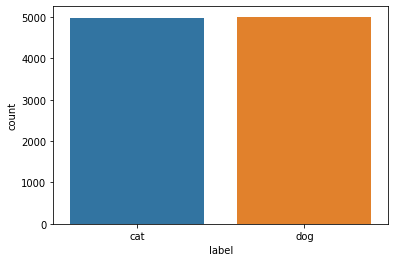

In [ ]:
# Summarise label details in training data
sns.countplot(x=df_train['label'])

This code defines a Python function called "load_images" that takes as input a list of image ids, a folder path where the images are stored, and the dimensions to resize the images to. The function returns a list of resized images.

The function starts by creating an empty list called "images" to hold the loaded and resized images.

It then iterates over each image id in the input "ids" list using a for loop. For each image id, it constructs the file path to the corresponding image file by concatenating the "folder_path" and the image id with the ".jpg" file extension. It then loads the image file using the OpenCV function "cv2.imread", which reads the image data from the file into a NumPy array.

After loading the image, the function checks if the image dimensions match the desired dimensions specified by the "dim" parameter. If the dimensions do not match, the function resizes the image using the OpenCV function "cv2.resize", which resizes the image to the desired dimensions. The resulting resized image is appended to the "images" list.

This process is repeated for each image id in the input list, resulting in a list of resized images.

Overall, this function provides a convenient way to load and resize a set of images for use in a machine learning model. It uses the OpenCV library to read and manipulate image data, which is a common library used for computer vision tasks.

In [ ]:
# parameters
# ids - list of image ids
# folder_path - path to image folder
# dim - dimensions to resize images
def load_images(ids, folder_path, dim):
  images = []
  for id in ids:
    image_path = os.path.join(folder_path, f'{id}.jpg')
    img = cv2.imread(image_path)

    # Resize if necessary
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images

This code loads a set of training and testing images for use in a machine learning model.

The first line defines the desired base dimensions for the images, which is a tuple of (200, 200).

The next two lines load the training and testing images, respectively.

For the training images, it uses the "load_images" function to load the first 7000 images from the training set, as specified by the slice notation [0:7000]/[0:9000] of the "df_train['id']" column. The function loads the images from the "train_images" folder and resizes them to the base dimensions specified by "base_dim". The resulting list of resized images is stored in the "train_images" variable, and the number of images loaded is printed to the console.

For the testing images, it also uses the "load_images" function to load all of the images from the "df_test['id']" column. The function loads the images from the "test_images" folder and resizes them to the base dimensions specified by "base_dim". The resulting list of resized images is stored in the "test_images" variable, and the number of images loaded is printed to the console.

Overall, this code provides a simple way to load a set of training and testing images for use in a machine learning model. It uses the "load_images" function to read the image data from disk and resize the images as necessary, and stores the resulting images in memory as lists.

In [ ]:
base_dim = (200, 200)

# load train images
train_image_folder = os.path.join('train_images')
train_images = load_images(df_train['id'][0:7000], train_image_folder, base_dim)
print(f'Number of training images loaded: {len(train_images)}')

# load test images
test_image_folder = os.path.join('test_images')
test_images = load_images(df_test['id'], test_image_folder, base_dim)
print(f'Number of testing images loaded: {len(test_images)}')

Number of training images loaded: 7000
Number of testing images loaded: 1000


## Feature extraction and model generation

This code is a Python script for evaluating a classification model. It includes two methods - one for plotting a confusion matrix and one for calculating evaluation results such as accuracy and confusion matrix. The method for plotting a confusion matrix takes an input of a matrix and plots it using matplotlib. The method for evaluating takes two inputs - actual values and predicted values - and returns the accuracy and a confusion matrix.

In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['0', '1']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions)
  return accuracy, confusion_matrix

### SVM
Support Vector Machines (SVMs) are a type of supervised machine learning algorithm that are used for both classification and regression tasks. SVMs are based on the idea of finding the optimal hyperplane that best separates the data points in a higher dimensional space. It is also used to detect outliers and classify data points by constructing a hyperplane to separate them.

This code is building a support vector machine (SVM) model using a linear kernel. The model is built using the X_train and y_train data sets, and then tested with the X_val and y_val data sets. The model is initialized with a random seed to ensure reproducibility of results.

In [ ]:
def build_svm_model(X_train, X_val, y_train, y_val):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)
  return clf

### KNN

K Nearest Neighbors (KNN) is a supervised machine learning algorithm that is used for classification and regression. KNN is a non-parametric, lazy learning algorithm. It uses a distance-based approach to classify a given data point into a given class. The algorithm requires a training dataset which is used to classify the test data. It calculates the distance between a test data point and all other training data points and assigns the most frequent class to the test data point.

This code builds a K-Nearest Neighbors (KNN) classification model. The parameter n_neighbors is set to 3 and the model is trained using the X_train and y_train data. The model is then returned and can be used to make predictions on unseen data, such as X_val.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def build_knn_model(X_train, X_val, y_train, y_val):
  # build model
  clf = KNeighborsClassifier(n_neighbors=3) 
  clf.fit(X_train, y_train)
  return clf

#### Model M1

- Preprocessing - gray scaling<br>
- Features - image vector<br>
- Algorithm - SVM <br>

The function starts by creating an empty list called "features_list" to hold the feature vectors for each image.

It then iterates over each image in the input "images" list using a for loop. For each image, it performs a simple preprocessing step to convert the image from BGR (blue-green-red) color space to grayscale using the OpenCV function "cv2.cvtColor". This converts the image from a 3-channel color image to a single-channel grayscale image, which can simplify subsequent feature extraction steps.

After the preprocessing step, the function extracts features from the grayscale image by flattening it into a 1D vector using the NumPy function "flatten". This converts the 2D grayscale image into a 1D feature vector, which can be used as input to a machine learning model.

The resulting feature vector is appended to the "features_list" using the "append" method. This process is repeated for each image in the input list, resulting in a list of feature vectors, where each vector represents the features of one image.

Finally, the list of feature vectors is converted to a NumPy array using the "np.array" function and returned by the function.

Overall, this function performs a simple feature extraction process for grayscale images, which can be used as a baseline for more complex feature extraction methods.

In [ ]:
# method to get image features
def get_features_m1(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
    features = img_grayscaled.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

Train and validate model

The first line of code calls the "get_features_m1" function, passing in a set of training images called "train_images". The function performs processing or feature extraction on the images to extract numerical features that can be used as inputs to a machine learning model. The resulting feature matrix is assigned to the variable "features_train".

The second line of code prints out the shape of the feature matrix using the "shape" attribute of the NumPy array. This allows us to see how many instances (i.e., images) are in the training data and how many features were extracted for each instance. For example, if the output is (1000, 1024), it would mean that there are 1000 images in the training set, and for each image, 1024 features were extracted. The specific shape of the feature matrix will depend on the implementation of the feature extraction function and the characteristics of the input images.

In [ ]:
# feature extraction
features_train = get_features_m1(train_images)
print(features_train.shape)

(7000, 40000)


This code is building a knn model using a train-test split. It takes four parameters - features_train (the training data), df_train (DataFrame containing the label column), X_train and X_val (the training and validation data, respectively) and y_train and y_val (the training and validation labels, respectively). It then uses the build_knn_model() function to train the model on the data and return the trained model (m1).

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'][0:7000], test_size=0.3, random_state=RANDOM_SEED)

# train model
m1 = build_knn_model(X_train, X_val, y_train, y_val)


This code is used to build a Support Vector Machine (SVM) model. The code splits the data into a training set and a validation set, and then builds the SVM model using the training set. The validation set is used to evaluate the accuracy of the model. The model is then used to classify new data points.

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'][0:7000], test_size=0.3, random_state=RANDOM_SEED)

# train model
m1 = build_svm_model(X_train, X_val, y_train, y_val)

This code is used to evaluate the performance of a machine learning model. Firstly, the model m1 is used to make predictions on the validation data X_val. Then, the accuracy and confusion matrix are evaluated by a function called evaluate() which takes in y_val and y_pred as parameters. Finally, the confusion matrix is plotted using the plot_confusion_matrix function.

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.5347619047619048


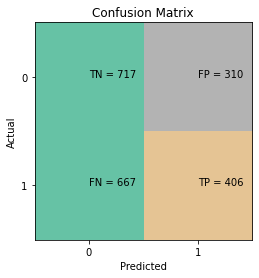

In [ ]:
# make predictions on validation data
y_pred = m1.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)


Make predictions on test images

The first line of code extracts features from the test images using a function called "get_features_m1" and assigns the resulting feature matrix to the variable "features_test". The "get_features_m1" function likely takes in the raw test images and performs some sort of processing or feature extraction to transform the images into a numerical feature representation that can be fed into the machine learning model.

The second line of code uses the trained model "m1" to make predictions on the test data. The "predict" method of the model object takes in the feature matrix as input and returns a vector of predicted labels or values for each instance in the test data. The resulting predictions are assigned to the variable "predictions".

Finally, the third line of code simply prints out the predictions so we can see the output of the model. The output could be in different formats depending on the type of problem and the specific implementation of the model, but it will likely be a vector or matrix of predicted labels or values for each instance in the test data.

In [ ]:
# feature extraction - test data
features_test = get_features_m1(test_images)
print(features_test.shape)

# get model predictions
predictions = m1.predict(features_test)
print(predictions)

(1000, 40000)
['cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat'
 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat'
 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat'
 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog'
 'dog' 'dog' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat'
 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 

The first line creates a new variable called "arr" and assigns it the value of the "predictions" variable, which should be a NumPy array containing the model's predictions on the test data.

The second line creates a new pandas DataFrame called "df" by passing the "arr" variable to the DataFrame constructor and specifying the column name as 'predictions'. This converts the NumPy array into a DataFrame with one column and as many rows as there are instances in the test data.

The third line simply prints the resulting DataFrame to the console, which should display the predictions in a tabular format with one column named 'predictions' and one row for each instance in the test data. The DataFrame can be further manipulated or saved as a file for further analysis or comparison with other models or predictions.

In [ ]:
import pandas as pd

# Create an array
arr = predictions

# Convert the array into a pandas DataFrame
df = pd.DataFrame(arr, columns=['predictions'])

print(df)

In [ ]:
id_add = df_test

In [ ]:
final=pd.concat([df, id_add], axis=1)

In [ ]:
final.to_csv('submission.csv')

In [ ]:
final.head(10)

In [ ]:
fin_ren = final.rename(columns={'predictions': 'prediction'})

The first line imports the necessary libraries for working with JSON and pandas dataframes. The second line selects two columns, "id" and "prediction", from a pandas dataframe called "fin_ren" and assigns the resulting dataframe to a new variable called "df_test".

The third line creates an empty list called "data" to hold the JSON-formatted data. The next few lines iterate over the rows of the "df_test" dataframe and append a dictionary to the "data" list for each row. The dictionary has two keys, "id" and "prediction", which correspond to the two columns in the original dataframe. The value for each key is the value from the corresponding column in the current row.

The fifth line prints the first five items in the "data" list to the console for debugging or verification purposes.

The next line specifies the file path and name for the output JSON file as "submission_file_path".

The "with open" block on lines 8-10 opens the file specified in "submission_file_path" in write mode, and iterates over the "data" list, writing each item to the file as a new line using the json.dumps method. This converts each dictionary in the list to a JSON-formatted string and writes it to the file.

Once the block is complete, the resulting file at "submission_file_path" should contain one line for each instance in the test data, with the "id" and "prediction" values separated by a colon and formatted as JSON. This file can then be submitted for evaluation to a competition or evaluation platform that accepts JSON-formatted predictions.

In [ ]:
import json

import pandas as pd

df_test = fin_ren[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))
